In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv("D:/Data for projects/Titanic/train.csv")
test_data=pd.read_csv("D:/Data for projects/Titanic/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### DATA CLEANING

In [16]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='vertical')
    fig=sns.barplot(x=ms.index, y=ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


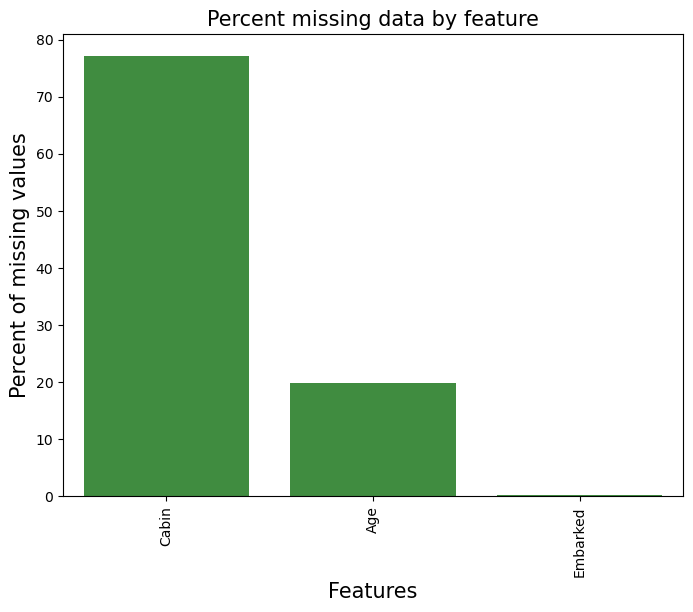

In [17]:
missingdata(train_data)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


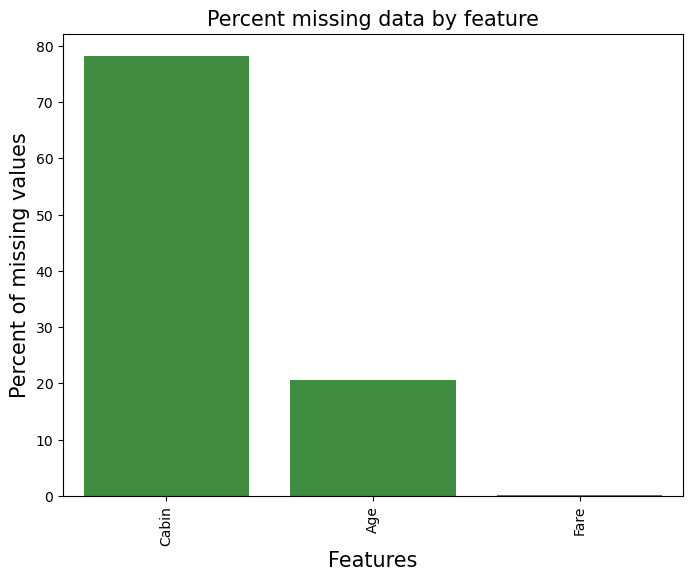

In [18]:
missingdata(test_data)

In [22]:
test_data.Age.fillna(test_data.Age.mean(),inplace=True)
test_data.Fare.fillna(test_data.Fare.median(),inplace=True)

In [29]:
train_data.Age.fillna(train_data.Age.mean(),inplace=True)
train_data.Embarked.fillna(train_data.Embarked.mode()[0],inplace=True)

In [31]:
drop_column = ['Cabin']
train_data.drop(drop_column, axis=1, inplace = True)
test_data.drop(drop_column,axis=1,inplace=True)

#### Feature Engineering

In [42]:
## combine test and train as single to apply some function
all_data=[train_data,test_data]

In [43]:
for i in all_data:
    i['FamilySize']=i.SibSp+i.Parch+1

In [44]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in all_data:
    dataset['Title']=dataset["Name"].apply(get_title)
    
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [45]:
## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [46]:
## create bin for fare features
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [47]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_data
testdf=test_data

In [48]:
all_dat=[traindf,testdf]
drop_column=['Age','Fare','Name','Ticket']
for dataset in all_dat:
    dataset.drop(drop_column, axis=1, inplace = True)

drop_column=["PassengerId"]
traindf.drop(drop_column,axis=1,inplace=True)

In [49]:
traindf.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,0,3,male,1,0,S,2,Mr,Adult,Low_fare
1,1,1,female,1,0,C,2,Mrs,Adult,high_fare
2,1,3,female,0,0,S,1,Miss,Adult,median_fare
3,1,1,female,1,0,S,2,Mrs,Adult,high_fare
4,0,3,male,0,0,S,1,Mr,Adult,median_fare


In [50]:
testdf.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,892,3,male,0,0,Q,1,Mr,Adult,Low_fare
1,893,3,female,1,0,S,2,Mrs,Elder,Low_fare
2,894,2,male,0,0,Q,1,Mr,Elder,median_fare
3,895,3,male,0,0,S,1,Mr,Adult,median_fare
4,896,3,female,1,1,S,3,Mrs,Adult,median_fare


In [51]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [52]:
traindf.head()

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,0,2,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,1,1,1,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,1,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [54]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


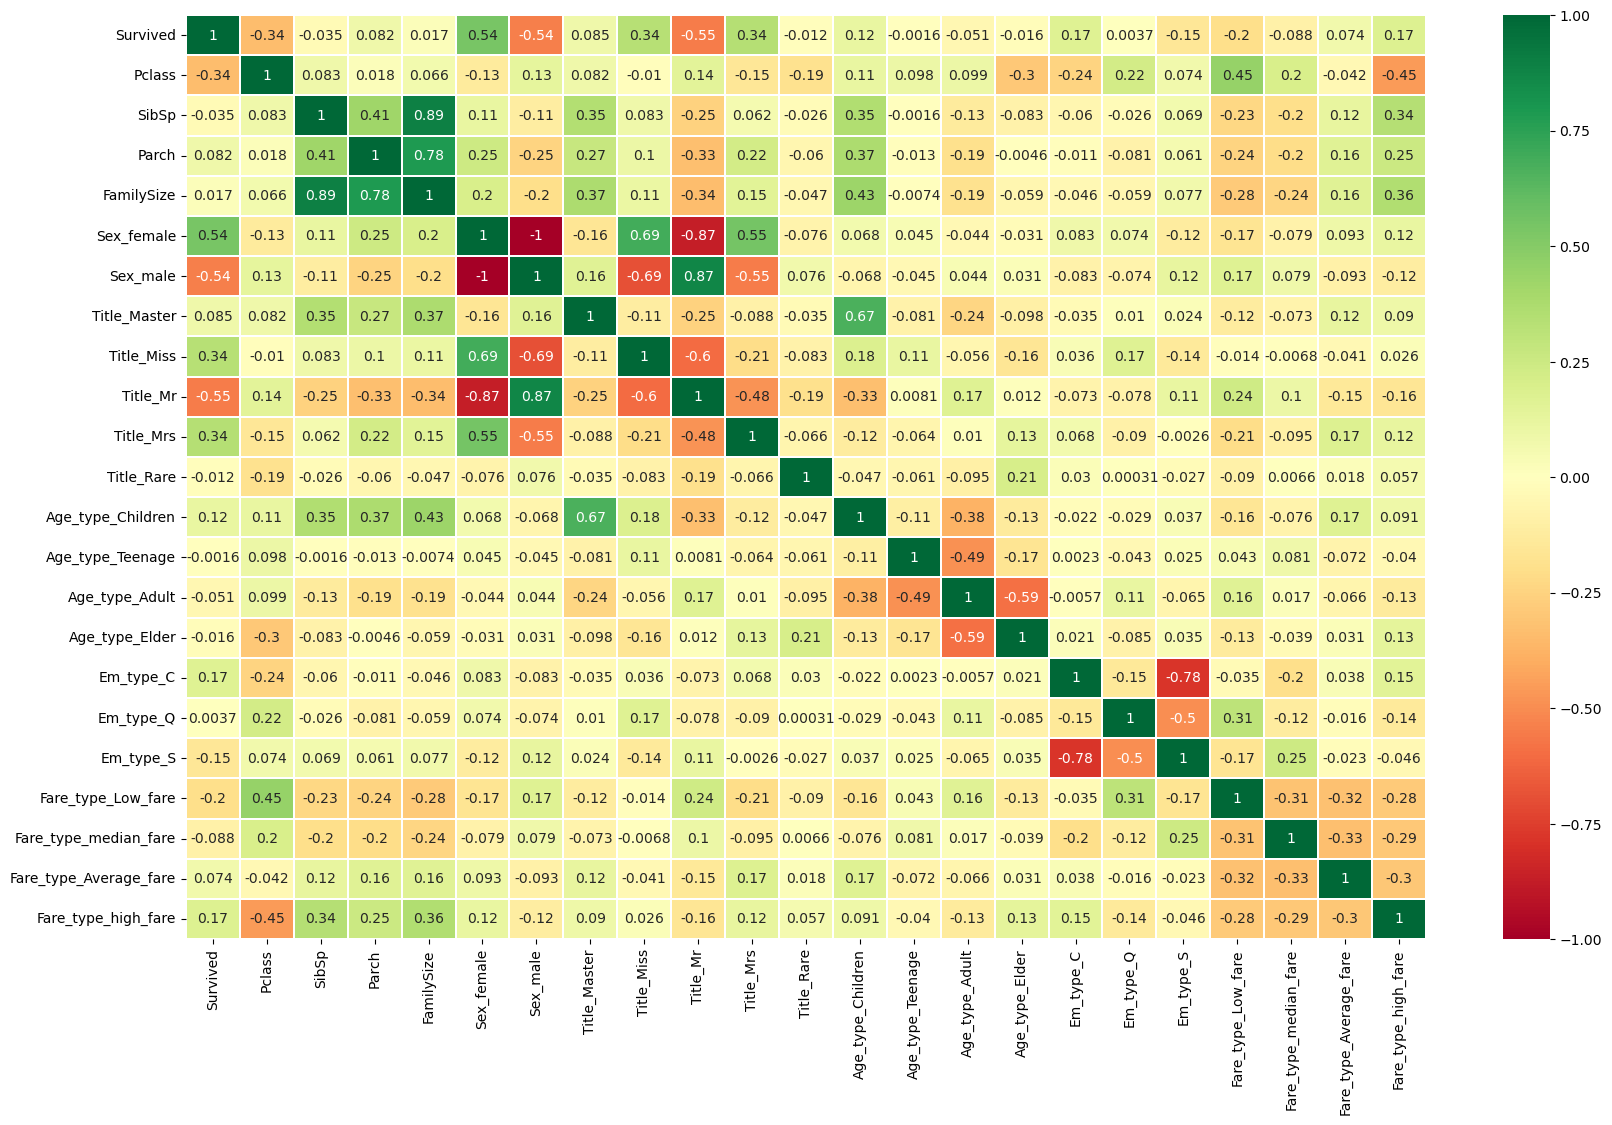

In [75]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

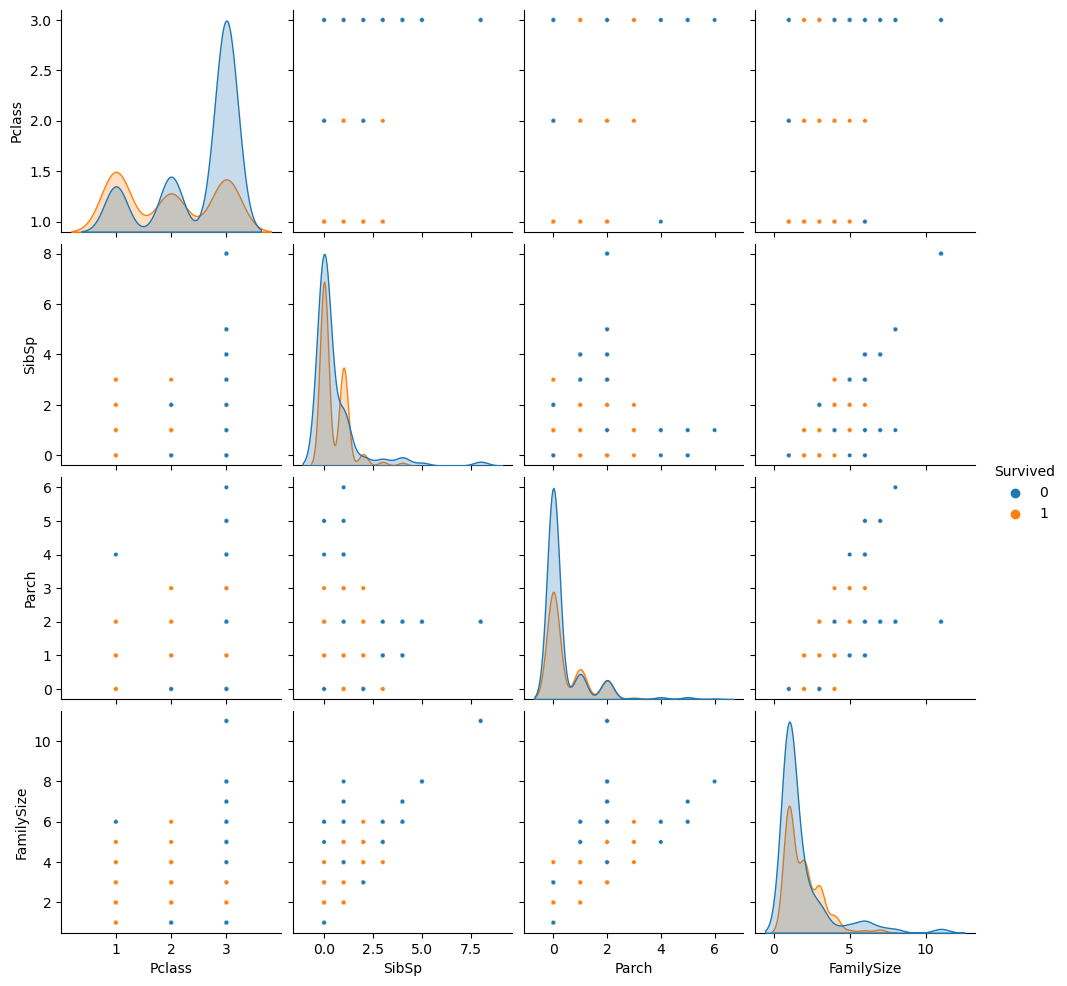

In [78]:
#pairplot
sns.pairplot(data=train_data,hue='Survived',plot_kws=dict(s=10))

In [81]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

In [82]:
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 79.48
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

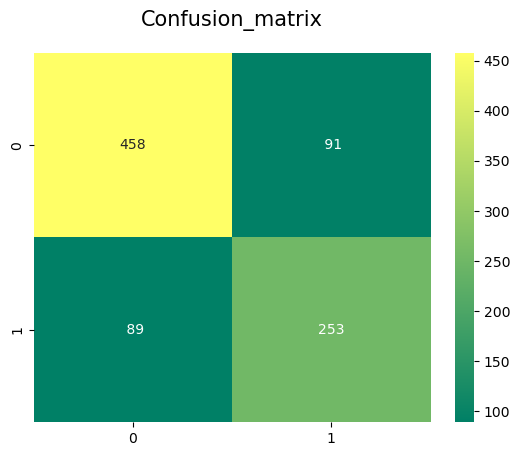

In [85]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)